In [18]:
# JM: Jan 12 2021
# notebook to read in CSV data of tide levels in Tobermory (Isle of Mull, Scotland)
# downloaded from BODC over a two year period

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# define some defaults
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["mathtext.rm"] = "serif"
plt.rcParams["image.cmap"] = "RdBu_r" # \"*_r\" is reverse of standard colour\n",
plt.rcParams["axes.formatter.limits"] = [-3, 3]
plt.rcParams["font.size"] = 12.0

data_dir = "/home/jclmak/data/tobermory_data_BODC/"
file = "Tobermory_20160430_20180430.csv"

data_full = pd.read_csv(data_dir + file)

In [6]:
# extract daily max and min over some period
days, tide_max, tide_min = [], [], []

year=2016
for i in range(120, 300):
    index = (   (pd.to_datetime(data_full["Date"]) > pd.to_datetime(f"{year}{i}", format="%Y%j"))
              & (pd.to_datetime(data_full["Date"]) < pd.to_datetime(f"{year}{i+1}", format="%Y%j"))
            )

    # append to stuff to the end of the list
    days.append(pd.to_datetime(f"{year}{i}", format="%Y%j"))
    tide_max.append(data_full[index][" \"Data value\""].max())
    tide_min.append(data_full[index][" \"Data value\""].min())

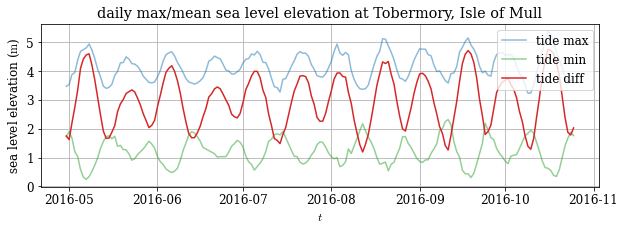

In [26]:
fig = plt.figure(figsize=(10, 3))
ax = plt.axes()
ax.plot(days, tide_max, alpha=0.5)
ax.plot(days, tide_min, "C2", alpha=0.5)
ax.plot(days, np.asarray(tide_max) - np.asarray(tide_min), "C3")
ax.grid()
ax.legend(["tide max", "tide min", "tide diff"], loc="upper right")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"sea level elevation ($\mathrm{m}$)")
ax.set_title(r"daily max/mean sea level elevation at Tobermory, Isle of Mull")

plt.savefig("../lec18/figures/tobermory_tide.png", dpi=150, bbox_inches="tight")